## Análisis de lluvias monocromaticas de Foton (GRB)

El set de simulaciones esta compuesto por 10000 lluvias verticales de Gamma con energías entre 100 GeV y 1 TeV. Simuladas con una distribución espectral con $\gamma = $2.2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import os

In [2]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/rpc_work/")
os.getcwd()

'/home/csarmiento/Documentos/rpc_work'

In [3]:
# 100 MeV
# 
df= pd.read_csv(r"100_1000GeV_GRB/100000.pri.bz2", compression='bz2', delimiter=" ")
df.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,181.571,-18.5877,0.0,0.0,909.0,114.0,0.0,0.0,1023.0
1,1,217.760,-23.3191,0.0,0.0,459.0,38.0,1.0,0.0,498.0
2,1,191.758,-33.9077,0.0,0.0,178.0,13.0,0.0,0.0,191.0
3,1,180.774,-31.8927,0.0,0.0,284.0,29.0,0.0,0.0,313.0
4,1,139.967,-24.0383,0.0,0.0,501.0,43.0,0.0,0.0,544.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   10000 non-null  int64  
 1   prm_energy   10000 non-null  float64
 2   prm_x0       10000 non-null  float64
 3   prm_theta    10000 non-null  float64
 4   prm_phi      10000 non-null  float64
 5   ph_obs_lev   10000 non-null  float64
 6   el_obs_lev   10000 non-null  float64
 7   hd_obs_lev   10000 non-null  float64
 8   mu_obs_lev   10000 non-null  float64
 9   tot_obs_lev  10000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


#### Distribución de energía de los primarios

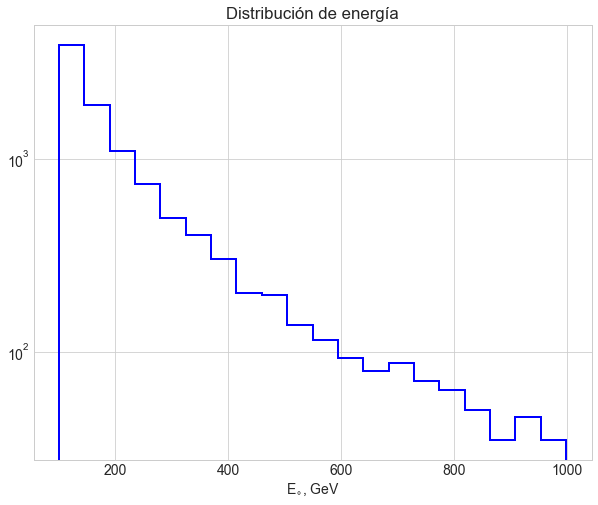

In [5]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(df["prm_energy"], bins=20, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"E$_{\circ}$, GeV")
#plt.legend()
plt.show()

#### Punto de primera interacción

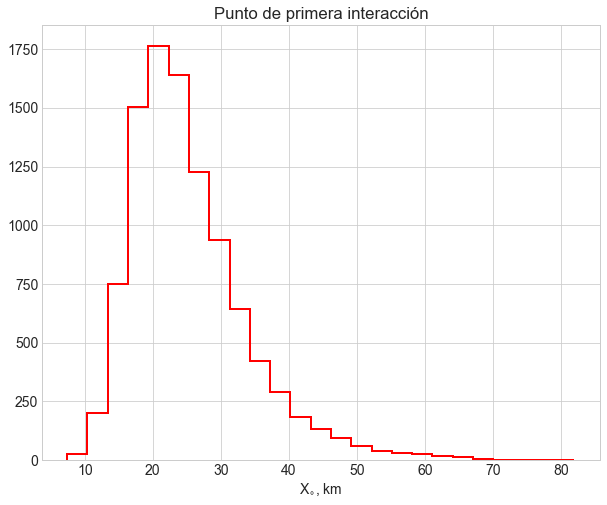

In [6]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
#plt.legend()
plt.show()

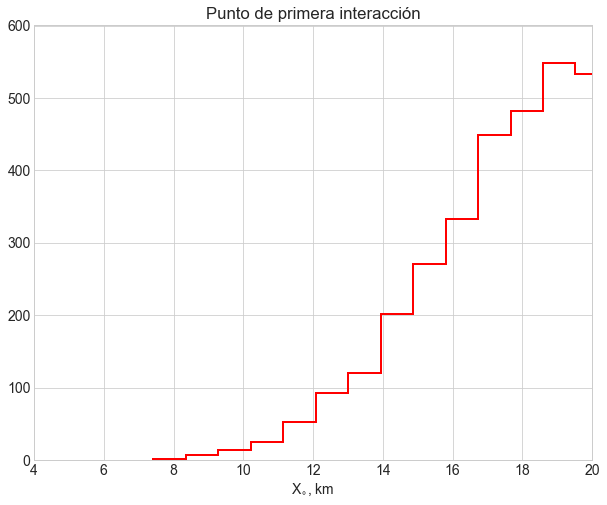

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=80, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
#pyplot.yscale('log')
#plt.legend()
plt.show()

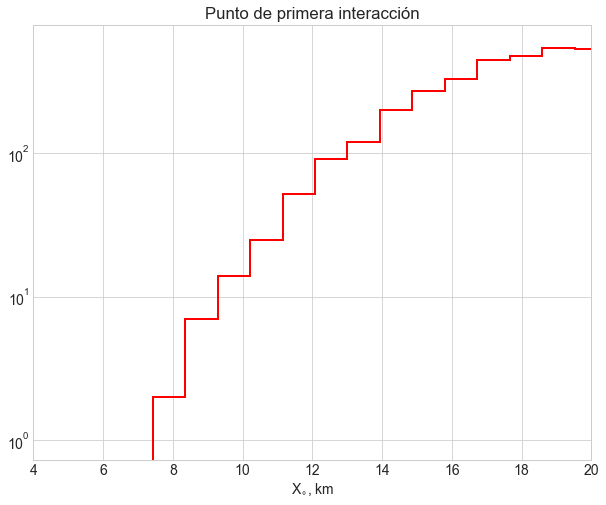

In [8]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=80, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
pyplot.yscale('log')
#plt.legend()
plt.show()

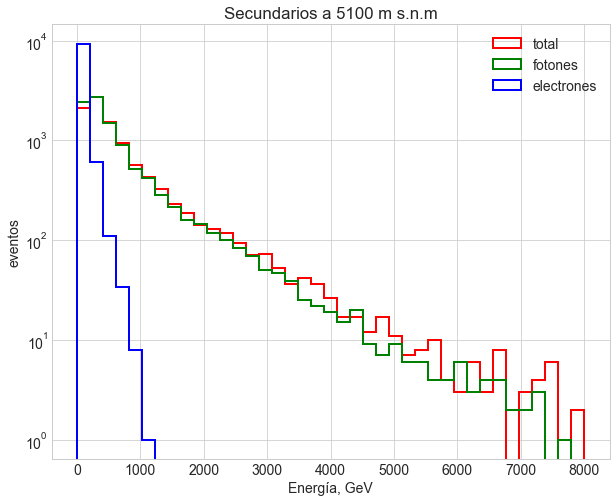

In [9]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
bins=np.linspace(0,8000,40)
plt.hist(df["tot_obs_lev"], bins, histtype='step', color="r", linewidth=2, fill=False, label="total");
plt.hist(df["ph_obs_lev"], bins, histtype='step', color="g", linewidth=2, fill=False, label="fotones");
plt.hist(df["el_obs_lev"], bins, histtype='step', color="b", linewidth=2, fill=False, label="electrones");

plt.title(r"Secundarios a 5100 m s.n.m")
plt.xlabel(r"Energía, GeV")
plt.ylabel(r"eventos")
#plt.xlim(4, 20)
#plt.ylim(None, 10000)
pyplot.yscale('log')
plt.legend()
plt.show()

Text(0, 0.5, 'pto de primera interacción, X$_{\\circ}$')

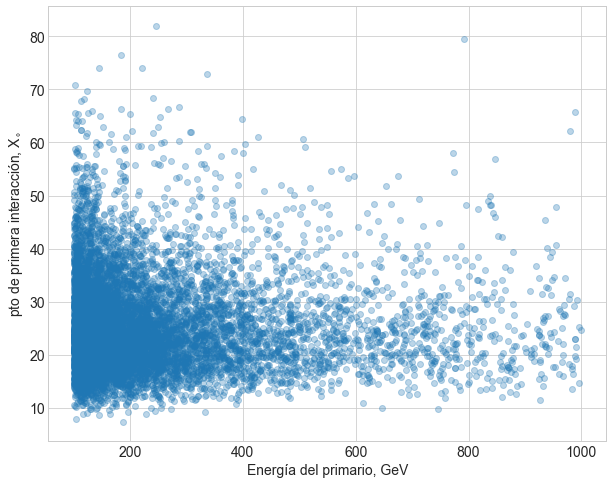

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], -df["prm_x0"], 'o', alpha=0.3)
plt.xlabel("Energía del primario, GeV")
plt.ylabel(r"pto de primera interacción, X$_{\circ}$")
#plt.xlim(0, 100)

(8.0, 20.0)

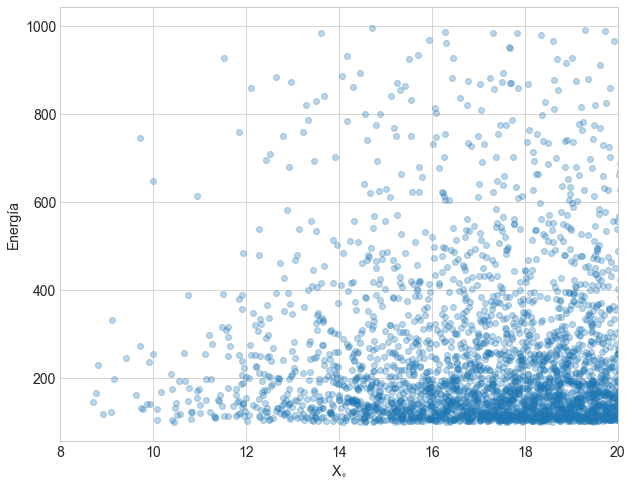

In [11]:
plt.figure(figsize=(10,8))
plt.plot(-df["prm_x0"],df["prm_energy"], 'o', alpha=0.3)
plt.ylabel("Energía")
plt.xlabel(r"X$_{\circ}$")
plt.xlim(8, 20)

###  Fotones que llegan sin interactuar

In [12]:
df_ = df[-df["prm_x0"]<=10]
df_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
56,1,236.267,-9.91650,0.0,0.0,2359.0,284.0,0.0,0.0,2643.0
993,1,130.175,-9.75556,0.0,0.0,1231.0,187.0,1.0,0.0,1419.0
1406,1,139.966,-9.87223,0.0,0.0,1366.0,198.0,0.0,0.0,1564.0
2022,1,103.615,-7.93645,0.0,0.0,707.0,122.0,0.0,0.0,829.0
2190,1,140.763,-9.93959,0.0,0.0,906.0,122.0,0.0,0.0,1028.0


In [13]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 56 to 9729
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   19 non-null     int64  
 1   prm_energy   19 non-null     float64
 2   prm_x0       19 non-null     float64
 3   prm_theta    19 non-null     float64
 4   prm_phi      19 non-null     float64
 5   ph_obs_lev   19 non-null     float64
 6   el_obs_lev   19 non-null     float64
 7   hd_obs_lev   19 non-null     float64
 8   mu_obs_lev   19 non-null     float64
 9   tot_obs_lev  19 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.6 KB


In [14]:
print(df_["prm_energy"], df_["prm_x0"], df_["tot_obs_lev"])

56      236.267
993     130.175
1406    139.966
2022    103.615
2190    140.763
2192    244.208
3070    196.640
3157    161.740
3558    186.835
4667    228.346
4842    646.864
5259    128.400
5426    272.236
5677    332.253
6526    122.886
8232    745.423
9087    116.700
9705    145.013
9729    165.210
Name: prm_energy, dtype: float64 56     -9.91650
993    -9.75556
1406   -9.87223
2022   -7.93645
2190   -9.93959
2192   -9.42966
3070   -9.15936
3157   -9.63610
3558   -7.41843
4667   -8.83055
4842   -9.99919
5259   -9.78266
5426   -9.72117
5677   -9.12546
6526   -9.09692
8232   -9.72262
9087   -8.92033
9705   -8.71664
9729   -8.78177
Name: prm_x0, dtype: float64 56      2643.0
993     1419.0
1406    1564.0
2022     829.0
2190    1028.0
2192    2507.0
3070    1850.0
3157    2136.0
3558    1318.0
4667    2131.0
4842    6566.0
5259    1588.0
5426    3304.0
5677    3041.0
6526    1425.0
8232    6665.0
9087    1135.0
9705    1825.0
9729    1682.0
Name: tot_obs_lev, dtype: float64


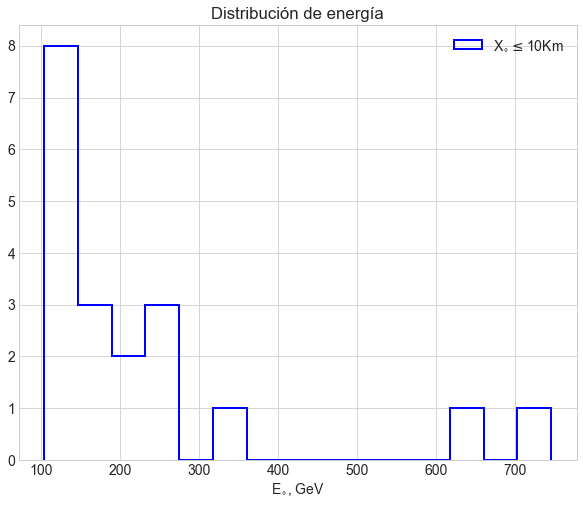

In [15]:
plt.figure(figsize=(10,8))
plt.hist(df_["prm_energy"], bins=15, histtype='step', color="b", linewidth=2, fill=False, label=r"X$_{\circ}\leq$10Km");
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
#pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"E$_{\circ}$, GeV")
plt.legend()
plt.show()

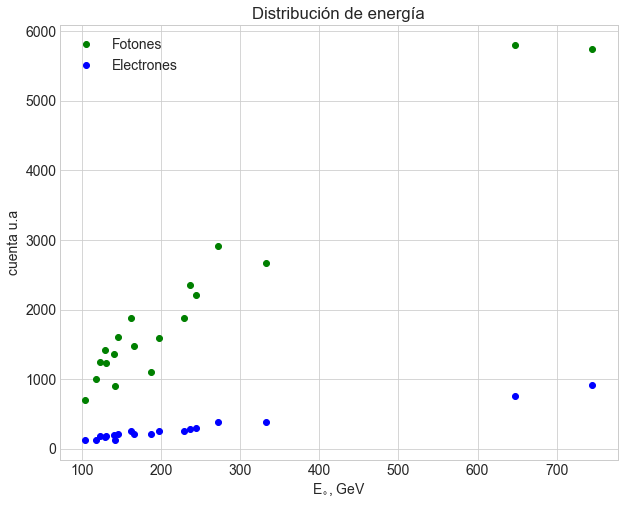

In [16]:
plt.figure(figsize=(10,8))
plt.plot(df_["prm_energy"], df_["ph_obs_lev"], 'o', color="g", linewidth=2, label="Fotones");
plt.plot(df_["prm_energy"], df_["el_obs_lev"], 'o', color="b", linewidth=2, label="Electrones");
#pyplot.yscale('log')
#plt.ylim(None, 600)
plt.title("Distribución de energía")
plt.xlabel(r"E$_{\circ}$, GeV")
#plt.xlim(0, 40)
plt.ylabel("cuenta u.a")
plt.legend()
plt.show()

In [17]:
print(df_["mu_obs_lev"])

56      0.0
993     0.0
1406    0.0
2022    0.0
2190    0.0
2192    0.0
3070    0.0
3157    0.0
3558    0.0
4667    2.0
4842    1.0
5259    0.0
5426    0.0
5677    0.0
6526    0.0
8232    0.0
9087    0.0
9705    0.0
9729    0.0
Name: mu_obs_lev, dtype: float64


In [18]:
print(df_["hd_obs_lev"])

56      0.0
993     1.0
1406    0.0
2022    0.0
2190    0.0
2192    0.0
3070    0.0
3157    0.0
3558    0.0
4667    0.0
4842    3.0
5259    0.0
5426    0.0
5677    0.0
6526    0.0
8232    0.0
9087    0.0
9705    0.0
9729    1.0
Name: hd_obs_lev, dtype: float64


In [5]:
ds = pd.read_csv(r"100_1000GeV_GRB/100000.sec.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,1,0.000427458,-0.001202,0.00987212,5932.97,-20024.2,370608.0,1,1,181.571,0,0.0
1,1,0.000809053,0.002178,0.00859961,44284.8,35978.8,370732.0,1,1,181.571,0,0.0
2,1,-0.00175957,0.000843,0.0128297,-12688.4,13503.1,370631.0,1,1,181.571,0,0.0
3,1,-0.000103821,-0.000516,0.00593508,-8255.76,-28246,370631.0,1,1,181.571,0,0.0
4,1,0.00303771,-0.000308,0.0192079,8272.38,9021.96,370617.0,1,1,181.571,0,0.0


In [7]:
len(ds)

7595960

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595960 entries, 0 to 7595959
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CorsikaId   object 
 1   px          object 
 2   py          float64
 3   pz          object 
 4   x           object 
 5   y           object 
 6   t           float64
 7   shower_id   object 
 8   prm_id      object 
 9   prm_energy  float64
 10  prm_theta   object 
 11  prm_phi     float64
dtypes: float64(4), object(8)
memory usage: 695.4+ MB


In [9]:
#Conversión de string a float de algunas variables
#
ds['CorsikaId'] = pd.to_numeric(ds['CorsikaId'],errors='coerce')
ds['shower_id'] = pd.to_numeric(ds['shower_id'],errors='coerce')
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

ds['px'] = pd.to_numeric(ds['px'],errors='coerce')
ds['py'] = pd.to_numeric(ds['py'],errors='coerce')
ds['pz'] = pd.to_numeric(ds['pz'],errors='coerce')

ds['x'] = ds['x']/100
ds['y'] = ds['y']/100

## Evento 1

In [23]:
ds_ = ds[ds["shower_id"]==2023]
ds_.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
1576499,1.0,-0.000027,-0.000066,0.004727,-9.51021,-1.871030,370577.0,2023.0,1,103.615,0,0.0
1576500,1.0,0.001952,0.000540,0.035761,2.70987,0.097832,370578.0,2023.0,1,103.615,0,0.0
1576501,1.0,0.000453,-0.000279,0.006826,1.73865,31.335600,370581.0,2023.0,1,103.615,0,0.0
1576502,1.0,-0.000583,0.000526,0.008107,-41.70530,32.169700,370591.0,2023.0,1,103.615,0,0.0
1576503,2.0,-0.000836,0.010160,0.027047,-36.43220,45.923900,370597.0,2023.0,1,103.615,0,0.0


In [24]:
E10 = np.sqrt(ds_["px"]**2 + ds_["py"]**2 + ds_["pz"]**2)

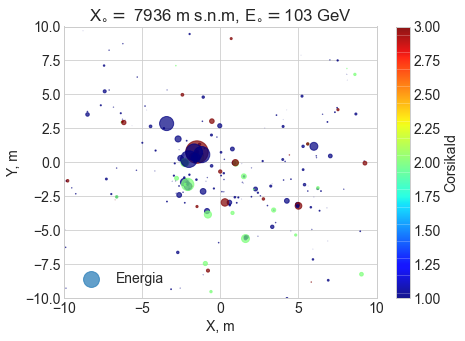

In [25]:
ds_.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E10*50, label="Energia", figsize=(7,5),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#plt.plot(ds_["x"], ds_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title(r"X$_{\circ}=$ 7936 m s.n.m, E$_{\circ}=$103 GeV")
plt.legend()
plt.show()

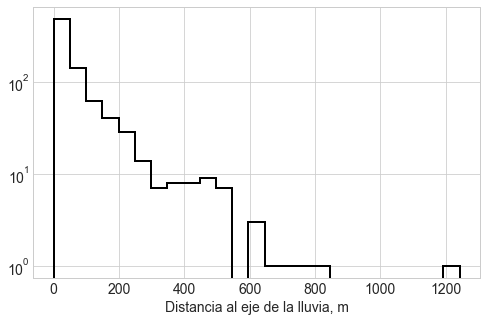

In [26]:
r=np.sqrt(ds_["x"]**2 + ds_["y"]**2)

plt.figure(figsize=(8,5))
plt.hist(r, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
#plt.title("Partículas de la lluvia")
plt.xlabel(r"Distancia al eje de la lluvia, m")
#plt.legend()
plt.show()

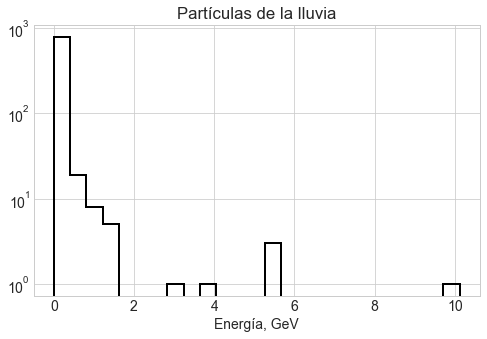

In [27]:
plt.figure(figsize=(8,5))
plt.hist(E10, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Partículas de la lluvia")
plt.xlabel(r"Energía, GeV")
#plt.legend()
plt.show()

In [28]:
np.sum(E10)

83.48996819138682

Text(0, 0.5, 'Energía, GeV')

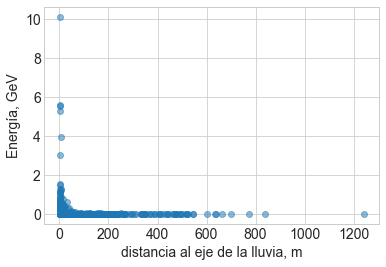

In [29]:
plt.plot(r,E10, 'o', alpha=0.5)
plt.xlabel("distancia al eje de la lluvia, m")
plt.ylabel("Energía, GeV")
#plt.xlim(0, 25)


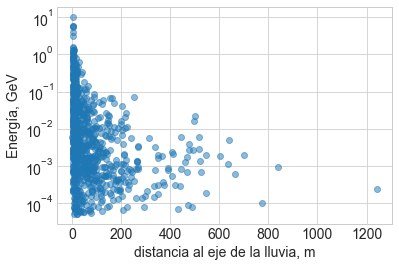

In [30]:
plt.plot(r,E10, 'o', alpha=0.5)
plt.xlabel("distancia al eje de la lluvia, m")
plt.ylabel("Energía, GeV")
pyplot.yscale('log')
#plt.xlim(20, 100)
#plt.ylim(0.1,10)

(0.05, 18.625678339795897)

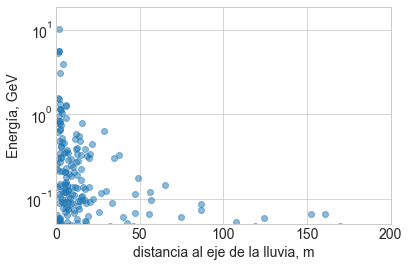

In [31]:
plt.plot(r,E10, 'o', alpha=0.5)
plt.xlabel("distancia al eje de la lluvia, m")
plt.ylabel("Energía, GeV")
pyplot.yscale('log')
plt.xlim(0, 200)
plt.ylim(50e-3, None)

In [32]:
ds_["Esec"] = np.sqrt(ds_["px"]**2 + ds_["py"]**2 + ds_["pz"]**2)
ds_["r"]=np.sqrt(ds_["x"]**2 + ds_["y"]**2)
ds_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 1576499 to 1577327
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   829 non-null    float64
 1   px          829 non-null    float64
 2   py          829 non-null    float64
 3   pz          829 non-null    float64
 4   x           829 non-null    float64
 5   y           829 non-null    float64
 6   t           829 non-null    float64
 7   shower_id   829 non-null    float64
 8   prm_id      829 non-null    object 
 9   prm_energy  829 non-null    float64
 10  prm_theta   829 non-null    object 
 11  prm_phi     829 non-null    float64
 12  Esec        829 non-null    float64
 13  r           829 non-null    float64
dtypes: float64(12), object(2)
memory usage: 97.1+ KB


/home/csarmiento/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/csarmiento/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
dse = ds_[ds_["r"]<=5]
dse.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,Esec,r
1576500,1.0,0.001952,5.396870e-04,0.035761,2.70987,0.097832,370578.0,2023.0,1,103.615,0,0.0,0.035819,2.711635
1576668,3.0,0.000983,1.078720e-03,0.004737,4.42230,0.550640,370584.0,2023.0,1,103.615,0,0.0,0.004957,4.456449
1576669,1.0,0.001861,-8.011460e-05,0.092992,3.22817,-1.742630,370577.0,2023.0,1,103.615,0,0.0,0.093011,3.668493
1576670,1.0,0.000004,7.688990e-08,0.000208,3.32843,-1.561390,370577.0,2023.0,1,103.615,0,0.0,0.000208,3.676464
1576671,1.0,0.000146,-1.483150e-04,0.005304,3.42858,-3.515960,370577.0,2023.0,1,103.615,0,0.0,0.005308,4.910920


In [34]:
np.sum(dse["Esec"])

56.95320883794414

## Evento 2

In [27]:
ds_ = ds[ds["shower_id"]==8233]
ds_.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,r,Esec
6309883,1.0,-0.000158,6.646570e-04,0.000383,-142.3840,232.05600,371048.0,8233.0,1,745.423,0,0.0,272.255745,0.000783
6309884,1.0,-0.000427,3.233370e-04,0.001608,15.2204,174.69700,370715.0,8233.0,1,745.423,0,0.0,175.358782,0.001694
6309885,1.0,0.000235,1.599040e-07,0.000361,-694.2350,285.11100,371967.0,8233.0,1,745.423,0,0.0,750.500178,0.000431
6309886,1.0,0.000093,4.553650e-05,0.000113,239.3000,281.78900,371097.0,8233.0,1,745.423,0,0.0,369.688424,0.000153
6309887,1.0,-0.000012,-4.625450e-05,0.000047,-167.1750,4.99488,370774.0,8233.0,1,745.423,0,0.0,167.249602,0.000067


In [28]:
E10 = np.sqrt(ds_["px"]**2 + ds_["py"]**2 + ds_["pz"]**2)

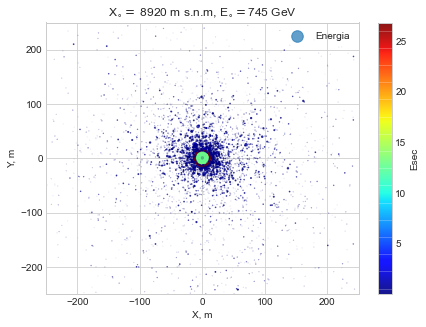

In [32]:
ds_.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E10*10, label="Energia", figsize=(7,5),
    c="Esec", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#plt.plot(ds_["x"], ds_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-250, 250)
plt.ylim(-250, 250)
plt.title(r"X$_{\circ}=$ 8920 m s.n.m, E$_{\circ}=$745 GeV")
plt.legend()
plt.show()


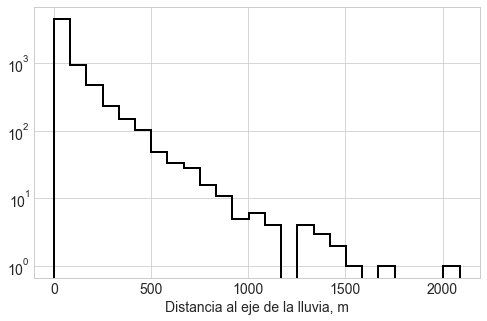

In [38]:
r=np.sqrt(ds_["x"]**2 + ds_["y"]**2)

plt.figure(figsize=(8,5))
plt.hist(r, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
#plt.title("Partículas de la lluvia")
plt.xlabel(r"Distancia al eje de la lluvia, m")
#plt.legend()
plt.show()

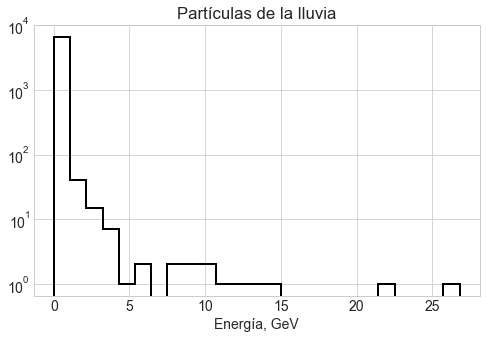

In [39]:
plt.figure(figsize=(8,5))
plt.hist(E10, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Partículas de la lluvia")
plt.xlabel(r"Energía, GeV")
#plt.legend()
plt.show()

In [40]:
np.sum(E10)

546.0669366814958

Text(0, 0.5, 'Energía, GeV')

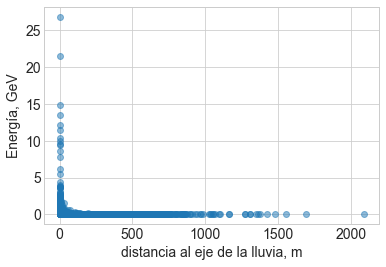

In [41]:
plt.plot(r,E10, 'o', alpha=0.5)
plt.xlabel("distancia al eje de la lluvia, m")
plt.ylabel("Energía, GeV")


(0.0, 5.0)

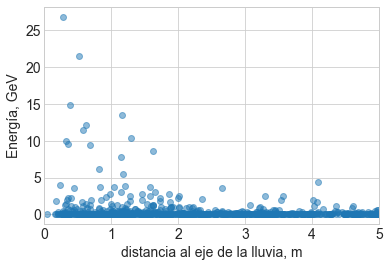

In [42]:
plt.plot(r,E10, 'o', alpha=0.5)
plt.xlabel("distancia al eje de la lluvia, m")
plt.ylabel("Energía, GeV")
plt.xlim(0, 5)

(0.05, 51.853944770638044)

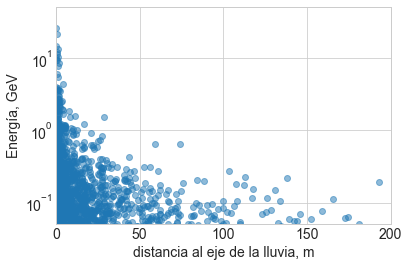

In [43]:
plt.plot(r, E10, 'o', alpha=0.5)
plt.xlabel("distancia al eje de la lluvia, m")
plt.ylabel("Energía, GeV")
pyplot.yscale('log')
plt.xlim(0, 200)
plt.ylim(50e-3, None)

In [44]:
ds_["Esec"] = np.sqrt(ds_["px"]**2 + ds_["py"]**2 + ds_["pz"]**2)
ds_["r"]=np.sqrt(ds_["x"]**2 + ds_["y"]**2)
ds_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 6309883 to 6316547
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   6665 non-null   float64
 1   px          6665 non-null   float64
 2   py          6665 non-null   float64
 3   pz          6665 non-null   float64
 4   x           6665 non-null   float64
 5   y           6665 non-null   float64
 6   t           6665 non-null   float64
 7   shower_id   6665 non-null   float64
 8   prm_id      6665 non-null   object 
 9   prm_energy  6665 non-null   float64
 10  prm_theta   6665 non-null   object 
 11  prm_phi     6665 non-null   float64
 12  Esec        6665 non-null   float64
 13  r           6665 non-null   float64
dtypes: float64(12), object(2)
memory usage: 781.1+ KB


/home/csarmiento/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/csarmiento/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
dse = ds_[ds_["r"]<=5]
dse.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,Esec,r
6309964,1.0,0.000049,4.763790e-05,0.125367,1.160710,1.179390,370577.0,8233.0,1,745.423,0,0.0,0.125367,1.654753
6310079,1.0,0.000107,-7.572540e-05,0.059323,3.355300,-2.686770,370577.0,8233.0,1,745.423,0,0.0,0.059323,4.298461
6310082,1.0,0.000017,8.482390e-07,0.009013,3.554760,0.944307,370577.0,8233.0,1,745.423,0,0.0,0.009013,3.678048
6310083,1.0,0.000012,-7.874720e-06,0.006514,3.279580,-0.985991,370577.0,8233.0,1,745.423,0,0.0,0.006514,3.424591
6310156,1.0,-0.000002,1.025100e-05,0.015808,-0.648822,2.339510,370577.0,8233.0,1,745.423,0,0.0,0.015808,2.427813


In [46]:
np.sum(dse["Esec"])

375.14551028619564

In [47]:
j = np.linspace(0,10000,10000)
print(j, len(j))

[0.00000000e+00 1.00010001e+00 2.00020002e+00 ... 9.99799980e+03
 9.99899990e+03 1.00000000e+04] 10000


In [48]:
ds_ = ds[ds["shower_id"]==2.0]
ds_["CorsikaId"].sum()

575.0

#### Número total de secundarios

In [10]:
len(ds)

7595960

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595960 entries, 0 to 7595959
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CorsikaId   float64
 1   px          float64
 2   py          float64
 3   pz          float64
 4   x           float64
 5   y           float64
 6   t           float64
 7   shower_id   float64
 8   prm_id      object 
 9   prm_energy  float64
 10  prm_theta   object 
 11  prm_phi     float64
dtypes: float64(10), object(2)
memory usage: 695.4+ MB


In [12]:
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

In [13]:
ds["r"] = np.sqrt(ds["x"]**2 + ds["y"]**2)
ds["Esec"] = np.sqrt(ds["px"]**2 + ds["py"]**2 + ds["pz"]**2)

In [14]:
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,r,Esec
0,1.0,0.000427,-0.001202,0.009872,59.3297,-200.2420,370608.0,1.0,1,181.571,0,0.0,208.846527,0.009954
1,1.0,0.000809,0.002178,0.008600,442.8480,359.7880,370732.0,1.0,1,181.571,0,0.0,570.580192,0.008908
2,1.0,-0.001760,0.000843,0.012830,-126.8840,135.0310,370631.0,1.0,1,181.571,0,0.0,185.291447,0.012977
3,1.0,-0.000104,-0.000516,0.005935,-82.5576,-282.4600,370631.0,1.0,1,181.571,0,0.0,294.277775,0.005958
4,1.0,0.003038,-0.000308,0.019208,82.7238,90.2196,370617.0,1.0,1,181.571,0,0.0,122.404262,0.019449


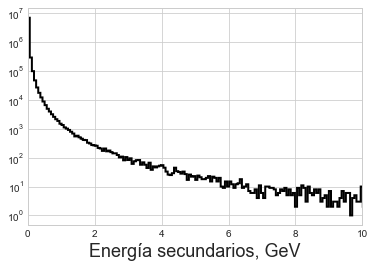

In [15]:
plt.hist(ds["Esec"], bins=2000, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Energía secundarios, GeV", fontsize=18)
plt.xlim(0, 10)
pyplot.yscale('log')
plt.show()

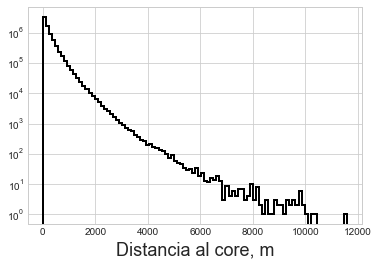

In [16]:
plt.hist(ds["r"], bins=100, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Distancia al core, m", fontsize=18)
#plt.xlim(0, 2000)
pyplot.yscale('log')
plt.show()

## Cortes de selección

### r$\leq$150 y E$_{sec} \geq$ 3 GeV

In [17]:
ds_cut = ds[(ds["r"]<=150) & (ds["Esec"]>=3)]

In [18]:
len(ds_cut)

2297

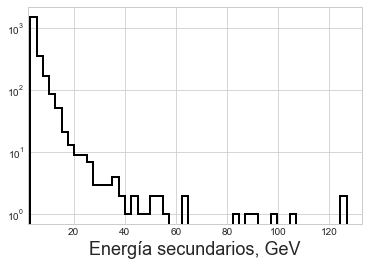

In [19]:
plt.hist(ds_cut["Esec"], bins=50, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Energía secundarios, GeV", fontsize=18)
plt.xlim(2, None)
pyplot.yscale('log')
plt.show()

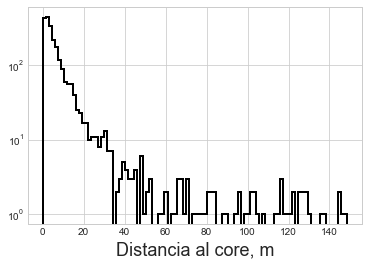

In [21]:
plt.hist(ds_cut["r"], bins=100, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Distancia al core, m", fontsize=18)
#plt.xlim(0, 2000)
pyplot.yscale('log')
plt.show()

Text(0, 0.5, 'energia sec')

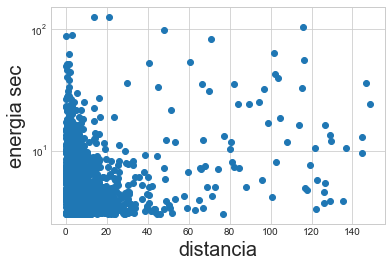

In [26]:
plt.plot(ds_cut["r"], ds_cut["Esec"], 'o')
pyplot.yscale('log')

plt.xlabel("distancia", fontsize=20)
plt.ylabel("energia sec", fontsize=20)

In [147]:
Es150_aux = []
j = np.linspace(0,10000,10001)
for i in range(0,10001):
    ds_ = ds_cut[ds_cut["shower_id"]==j[i]]
    #print(ds_["shower_id"], ds_["prm_energy"], ds_["Esec"].sum())
    Es150_aux.append(ds_["Esec"].sum())
    #print(ds_["Esec"].sum())

In [148]:
Es150 = [i for i in Es150_aux if i != 0]

In [153]:
len(Es150)

1173

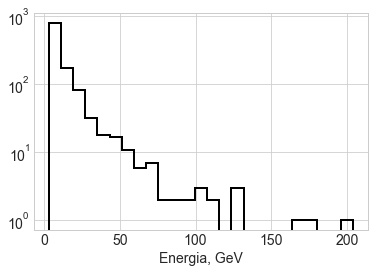

In [155]:
plt.hist(Es150, bins=25, histtype='step', color="k", linewidth=2, fill=False)
#plt.xlim(0, 1000)
pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

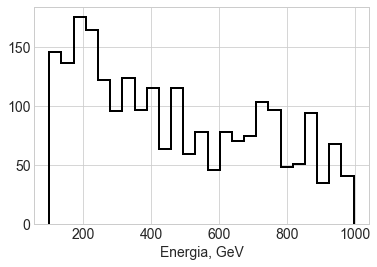

In [158]:
plt.hist(ds_cut["prm_energy"], bins=25, histtype='step', color="k", linewidth=2, fill=False)
#plt.xlim(0, 1000)
#pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

### r$\leq$150 y E$_{sec} \geq$ 10 GeV

In [159]:
ds_cut = ds[(ds["r"]<=150) & (ds["Esec"]>=10)]

In [160]:
len(ds_cut)

255

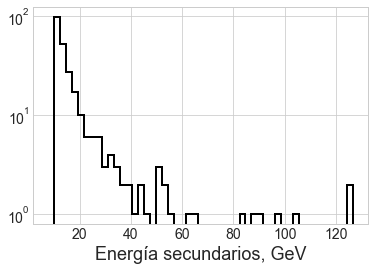

In [161]:
plt.hist(ds_cut["Esec"], bins=50, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Energía secundarios, GeV", fontsize=18)
plt.xlim(2, None)
pyplot.yscale('log')
plt.show()

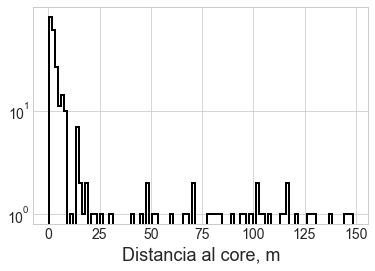

In [162]:
plt.hist(ds_cut["r"], bins=100, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Distancia al core, m", fontsize=18)
#plt.xlim(0, 2000)
pyplot.yscale('log')
plt.show()

In [163]:
Es150_aux = []
j = np.linspace(0,10000,10001)
for i in range(0,10001):
    ds_ = ds_cut[ds_cut["shower_id"]==j[i]]
    #print(ds_["shower_id"], ds_["prm_energy"], ds_["Esec"].sum())
    Es150_aux.append(ds_["Esec"].sum())
    #print(ds_["Esec"].sum())

In [164]:
Es150 = [i for i in Es150_aux if i != 0]

In [165]:
len(Es150)

205

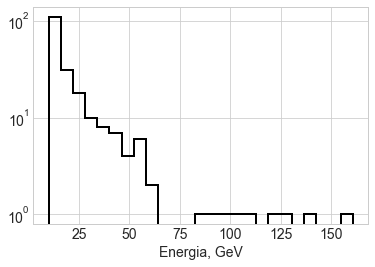

In [166]:
plt.hist(Es150, bins=25, histtype='step', color="k", linewidth=2, fill=False)
#plt.xlim(0, 1000)
pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

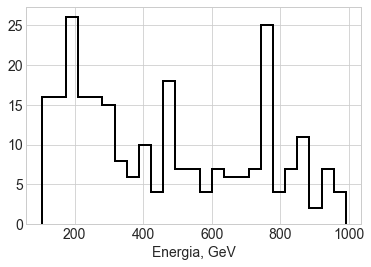

In [168]:
plt.hist(ds_cut["prm_energy"], bins=25, histtype='step', color="k", linewidth=2, fill=False)
#plt.xlim(0, 1000)
#pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

### r$\leq$25 y E$_{sec} \geq$ 3 GeV

In [169]:
ds_cut = ds[(ds["r"]<=25) & (ds["Esec"]>=3)]

In [170]:
len(ds_cut)

2139

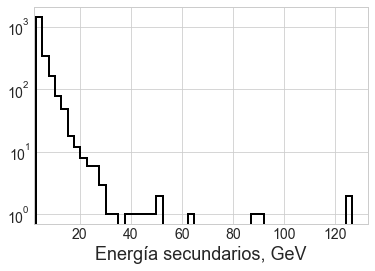

In [171]:
plt.hist(ds_cut["Esec"], bins=50, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Energía secundarios, GeV", fontsize=18)
plt.xlim(2, None)
pyplot.yscale('log')
plt.show()

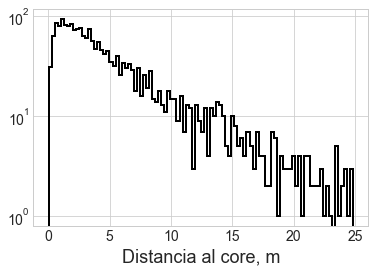

In [172]:
plt.hist(ds_cut["r"], bins=100, histtype='step', color="k", linewidth=2, fill=False)
plt.xlabel("Distancia al core, m", fontsize=18)
#plt.xlim(0, 2000)
pyplot.yscale('log')
plt.show()

In [173]:
Es150_aux = []
j = np.linspace(0,10000,10001)
for i in range(0,10001):
    ds_ = ds_cut[ds_cut["shower_id"]==j[i]]
    #print(ds_["shower_id"], ds_["prm_energy"], ds_["Esec"].sum())
    Es150_aux.append(ds_["Esec"].sum())
    #print(ds_["Esec"].sum())

In [174]:
Es150 = [i for i in Es150_aux if i != 0]

In [175]:
len(Es150)

1063

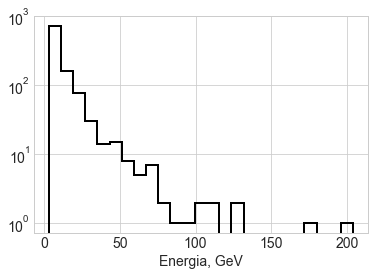

In [176]:
plt.hist(Es150, bins=25, histtype='step', color="k", linewidth=2, fill=False)
#plt.xlim(0, 1000)
pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

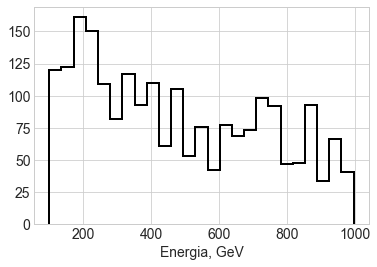

In [177]:
plt.hist(ds_cut["prm_energy"], bins=25, histtype='step', color="k", linewidth=2, fill=False)
#plt.xlim(0, 1000)
#pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

# Análisis Energía

In [49]:
ds = pd.read_csv(r"100_1000GeV_GRB/filter_r_5m.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,0
0,1,0.000111162,-0.000009,0.0260693,144.71,-471.697,370577.0,1,1,181.571,0,0.0,0.026069
1,1,-3.05436e-05,-0.000083,0.0141779,2.91439,44.3898,370577.0,1,1,181.571,0,0.0,0.014178
2,2,-0.000973284,-0.000875,0.00362402,-378.334,33.8496,370590.0,1,1,181.571,0,0.0,0.003853
3,1,-1.10416e-05,-0.000028,0.000248883,-369.457,-8.05976,370579.0,1,1,181.571,0,0.0,0.000251
4,2,-0.00258855,-0.005009,0.0424743,-375.709,-11.3495,370579.0,1,1,181.571,0,0.0,0.042847


In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96143 entries, 0 to 96142
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   96143 non-null  object 
 1   px          96143 non-null  object 
 2   py          96143 non-null  float64
 3   pz          96143 non-null  object 
 4   x           96143 non-null  object 
 5   y           96143 non-null  object 
 6   t           96143 non-null  float64
 7   shower_id   96143 non-null  object 
 8   prm_id      96143 non-null  object 
 9   prm_energy  96143 non-null  float64
 10  prm_theta   96143 non-null  object 
 11  prm_phi     96143 non-null  float64
 12  0           96142 non-null  float64
dtypes: float64(5), object(8)
memory usage: 9.5+ MB


In [52]:
#Conversión de string a float de algunas variables
#
ds['CorsikaId'] = pd.to_numeric(ds['CorsikaId'],errors='coerce')
ds['shower_id'] = pd.to_numeric(ds['shower_id'],errors='coerce')
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

ds['px'] = pd.to_numeric(ds['px'],errors='coerce')
ds['py'] = pd.to_numeric(ds['py'],errors='coerce')
ds['pz'] = pd.to_numeric(ds['pz'],errors='coerce')

ds['x'] = ds['x']/100
ds['y'] = ds['y']/100

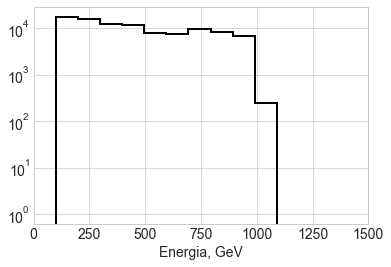

In [53]:
plt.hist(ds["prm_energy"], bins=100, histtype='step', color="k", linewidth=2, fill=False)
plt.xlim(0, 1500)
pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

## Análisis r < 5 m

In [54]:
ds["Esec"] = np.sqrt(ds["px"]**2 + ds["py"]**2 + ds["pz"]**2)
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,0,Esec
0,1.0,0.000111,-0.000009,0.026069,1.447100,-4.716970,370577.0,1.0,1,181.571,0,0.0,0.026069,0.026070
1,1.0,-0.000031,-0.000083,0.014178,0.029144,0.443898,370577.0,1.0,1,181.571,0,0.0,0.014178,0.014178
2,2.0,-0.000973,-0.000875,0.003624,-3.783340,0.338496,370590.0,1.0,1,181.571,0,0.0,0.003853,0.003853
3,1.0,-0.000011,-0.000028,0.000249,-3.694570,-0.080598,370579.0,1.0,1,181.571,0,0.0,0.000251,0.000251
4,2.0,-0.002589,-0.005009,0.042474,-3.757090,-0.113495,370579.0,1.0,1,181.571,0,0.0,0.042847,0.042847


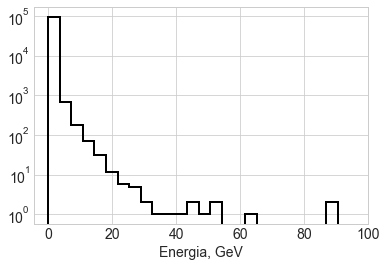

In [55]:
plt.hist(ds["Esec"], bins=25, histtype='step', color="k", linewidth=2, fill=False)
plt.xlim(None, 100)
pyplot.yscale('log')
plt.xlabel("Energia, GeV")
plt.show()

In [56]:
Es5 = []
j = np.linspace(0,10000,10001)
for i in range(0,10001):
    ds_ = ds[ds["shower_id"]==j[i]]
    #print(ds_["shower_id"], ds_["prm_energy"], ds_["Esec"].sum())
    Es5.append(ds_["Esec"].sum())
    #print(ds_["Esec"].sum())

In [57]:
#print(Es, len(Es))

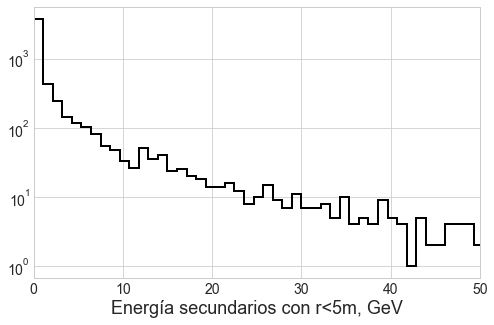

In [58]:
Es5_ = [i for i in Es5 if i != 0]
plt.figure(figsize=(8,5))
plt.hist(Es5_, bins=350, histtype='step', color="k", linewidth=2, fill=False);
pyplot.yscale('log')
plt.xlabel("Energía secundarios con r<5m, GeV", fontsize=18)
plt.xlim(0, 50)
plt.show()

In [59]:
len(Es5_)

5538

Text(0, 0.5, 'Energía secundarios con r<5m, GeV')

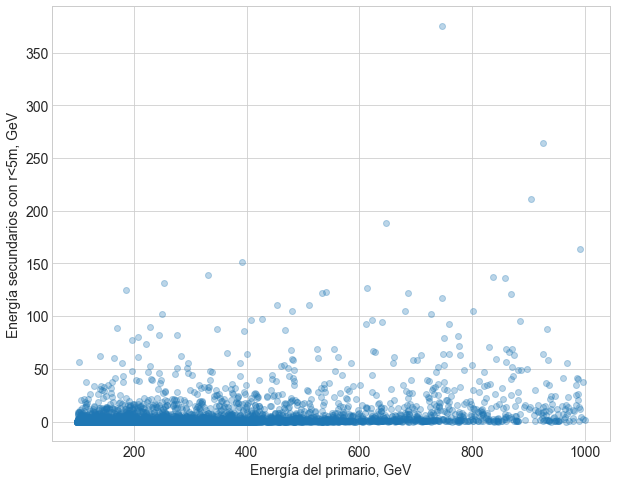

In [60]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], Es5[1:10001], 'o', alpha=0.3)
plt.xlabel("Energía del primario, GeV")
plt.ylabel("Energía secundarios con r<5m, GeV")

Text(0, 0.5, 'Energía secundarios con r<5m, GeV')

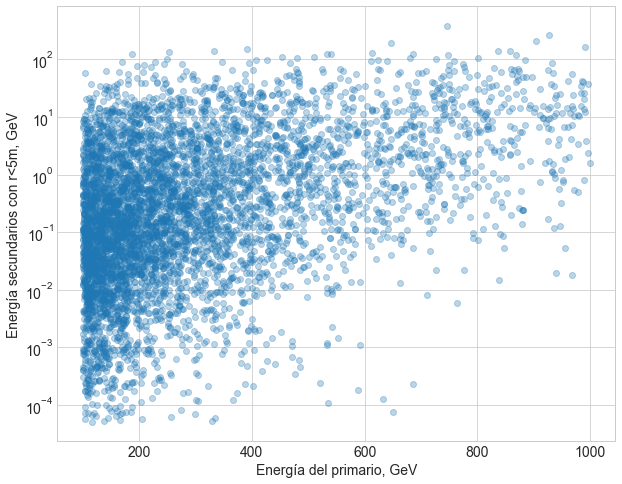

In [61]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], Es5[1:10001], 'o', alpha=0.3)
pyplot.yscale('log')

plt.xlabel("Energía del primario, GeV")
plt.ylabel("Energía secundarios con r<5m, GeV")

In [62]:
Es_e = [i for i in Es5 if i > 10]
len(Es_e)

563

## Análisis r > 4 m

In [63]:
ds = pd.read_csv(r"100_1000GeV_GRB/filter_r_4m.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68323 entries, 0 to 68322
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   68323 non-null  object 
 1   px          68323 non-null  object 
 2   py          68323 non-null  float64
 3   pz          68323 non-null  object 
 4   x           68323 non-null  object 
 5   y           68323 non-null  object 
 6   t           68323 non-null  float64
 7   shower_id   68323 non-null  object 
 8   prm_id      68323 non-null  object 
 9   prm_energy  68323 non-null  float64
 10  prm_theta   68323 non-null  object 
 11  prm_phi     68323 non-null  float64
 12  0           68322 non-null  float64
dtypes: float64(5), object(8)
memory usage: 6.8+ MB


In [65]:
#Conversión de string a float de algunas variables
#
ds['CorsikaId'] = pd.to_numeric(ds['CorsikaId'],errors='coerce')
ds['shower_id'] = pd.to_numeric(ds['shower_id'],errors='coerce')
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

ds['px'] = pd.to_numeric(ds['px'],errors='coerce')
ds['py'] = pd.to_numeric(ds['py'],errors='coerce')
ds['pz'] = pd.to_numeric(ds['pz'],errors='coerce')

ds['x'] = ds['x']/100
ds['y'] = ds['y']/100

In [86]:
ds["Esec"] = np.sqrt(ds["px"]**2 + ds["py"]**2 + ds["pz"]**2)
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,0,Esec
0,1.0,-0.000031,-0.000083,0.014178,0.029144,0.443898,370577.0,1.0,0001,181.571,+00.000,0.0,0.014178,0.014178
1,1.0,0.000022,0.000049,0.261190,0.607216,2.273900,370577.0,5.0,0001,139.967,+00.000,0.0,0.261190,0.261190
2,1.0,0.000007,0.000001,0.000618,2.303030,0.934758,370577.0,12.0,0001,185.326,+00.000,0.0,0.000618,0.000618
3,1.0,-0.000050,-0.000036,0.004998,0.088174,-0.808791,370578.0,13.0,0001,213.111,+00.000,0.0,0.004998,0.004998
4,1.0,-0.000042,-0.000083,0.010165,2.343580,-0.896505,370577.0,16.0,0001,955.914,+00.000,0.0,0.010165,0.010165


In [87]:
len(ds)

43486

In [67]:
Es4 = []
j = np.linspace(0,10000,10001)
for i in range(0,10001):
    ds_ = ds[ds["shower_id"]==j[i]]
    #print(ds_["shower_id"], ds_["prm_energy"], ds_["Esec"].sum())
    Es4.append(ds_["Esec"].sum())
    #print(ds_["Esec"].sum())

In [68]:
#print(Es, len(Es))

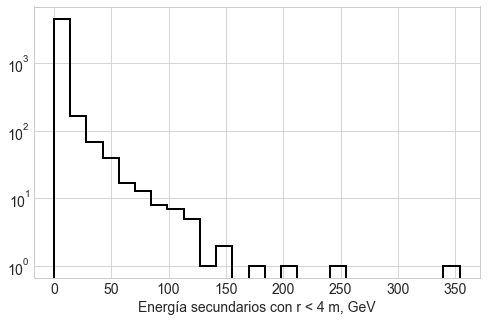

In [69]:
Es4_ = [i for i in Es4 if i != 0]
plt.figure(figsize=(8,5))
plt.hist(Es4_, bins=25, histtype='step', color="k", linewidth=2, fill=False);
pyplot.yscale('log')
plt.xlabel("Energía secundarios con r < 4 m, GeV")
plt.show()


In [70]:
len(Es4_)

4829

Text(0, 0.5, 'Energía secundarios con r < 4 m, GeV')

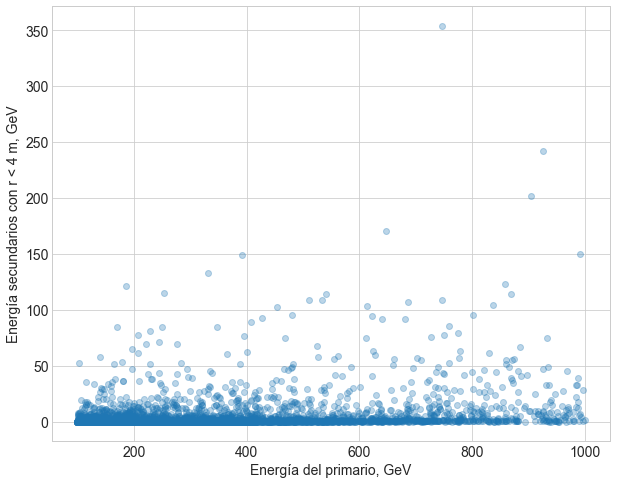

In [71]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], Es4[1:10001], 'o', alpha=0.3)
plt.xlabel("Energía del primario, GeV")
plt.ylabel("Energía secundarios con r < 4 m, GeV")

Text(0, 0.5, 'Energía secundarios con r < 4 m, GeV')

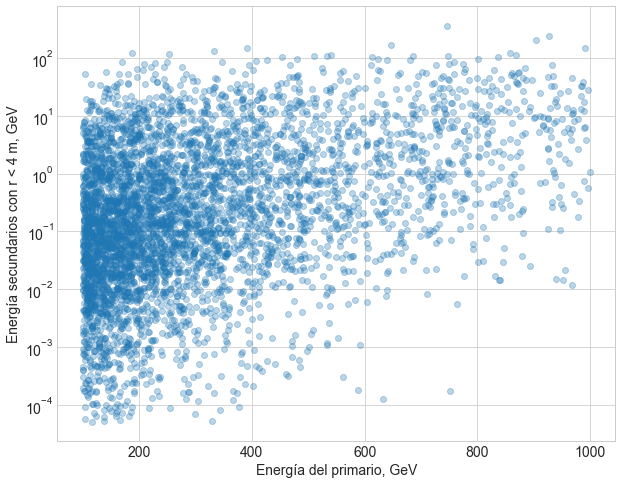

In [72]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], Es4[1:10001], 'o', alpha=0.3)
pyplot.yscale('log')

plt.xlabel("Energía del primario, GeV")
plt.ylabel("Energía secundarios con r < 4 m, GeV")

In [73]:
Es_e = [i for i in Es4 if i > 10]
len(Es_e)

452

## Análisis r > 3 m

In [74]:
ds = pd.read_csv(r"100_1000GeV_GRB/filter_r_3m.bz2", compression='bz2', delimiter=" ")

In [75]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43486 entries, 0 to 43485
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   43486 non-null  object 
 1   px          43486 non-null  object 
 2   py          43486 non-null  float64
 3   pz          43486 non-null  object 
 4   x           43486 non-null  object 
 5   y           43486 non-null  object 
 6   t           43486 non-null  float64
 7   shower_id   43486 non-null  object 
 8   prm_id      43486 non-null  object 
 9   prm_energy  43486 non-null  float64
 10  prm_theta   43486 non-null  object 
 11  prm_phi     43486 non-null  float64
 12  0           43485 non-null  float64
dtypes: float64(5), object(8)
memory usage: 4.3+ MB


In [76]:
#Conversión de string a float de algunas variables
#
ds['CorsikaId'] = pd.to_numeric(ds['CorsikaId'],errors='coerce')
ds['shower_id'] = pd.to_numeric(ds['shower_id'],errors='coerce')
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

ds['px'] = pd.to_numeric(ds['px'],errors='coerce')
ds['py'] = pd.to_numeric(ds['py'],errors='coerce')
ds['pz'] = pd.to_numeric(ds['pz'],errors='coerce')

ds['x'] = ds['x']/100
ds['y'] = ds['y']/100

In [77]:
ds["Esec"] = np.sqrt(ds["px"]**2 + ds["py"]**2 + ds["pz"]**2)
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi,0,Esec
0,1.0,-0.000031,-0.000083,0.014178,0.029144,0.443898,370577.0,1.0,0001,181.571,+00.000,0.0,0.014178,0.014178
1,1.0,0.000022,0.000049,0.261190,0.607216,2.273900,370577.0,5.0,0001,139.967,+00.000,0.0,0.261190,0.261190
2,1.0,0.000007,0.000001,0.000618,2.303030,0.934758,370577.0,12.0,0001,185.326,+00.000,0.0,0.000618,0.000618
3,1.0,-0.000050,-0.000036,0.004998,0.088174,-0.808791,370578.0,13.0,0001,213.111,+00.000,0.0,0.004998,0.004998
4,1.0,-0.000042,-0.000083,0.010165,2.343580,-0.896505,370577.0,16.0,0001,955.914,+00.000,0.0,0.010165,0.010165


In [78]:
Es3 = []
j = np.linspace(0,10000,10001)
for i in range(0,10001):
    ds_ = ds[ds["shower_id"]==j[i]]
    #print(ds_["shower_id"], ds_["prm_energy"], ds_["Esec"].sum())
    Es3.append(ds_["Esec"].sum())
    #print(ds_["Esec"].sum())

In [79]:
#print(Es, len(Es))

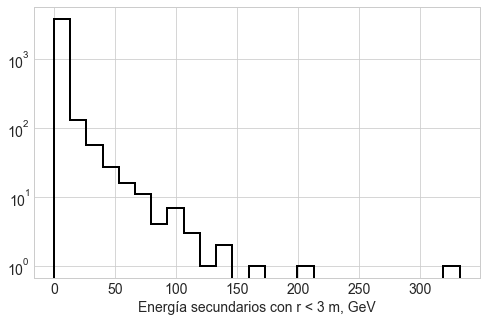

In [80]:
Es3_ = [i for i in Es3 if i != 0]
plt.figure(figsize=(8,5))
plt.hist(Es3_, bins=25, histtype='step', color="k", linewidth=2, fill=False);
pyplot.yscale('log')
plt.xlabel("Energía secundarios con r < 3 m, GeV")
plt.show()


In [81]:
len(Es3_)

4014

Text(0, 0.5, 'Energía secundarios con r < 3 m, GeV')

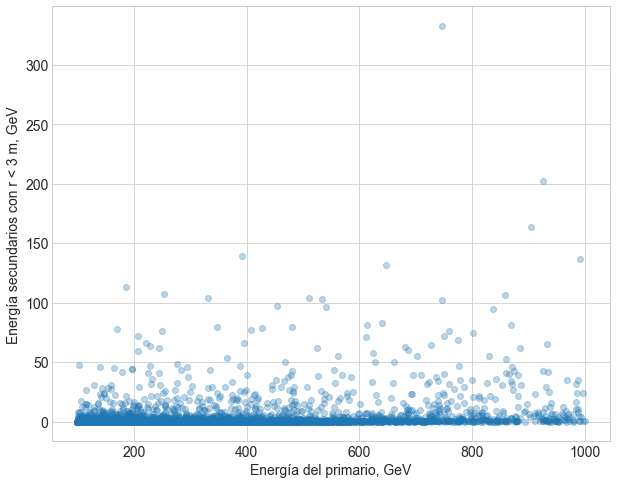

In [82]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], Es3[1:10001], 'o', alpha=0.3)
plt.xlabel("Energía del primario, GeV")
plt.ylabel("Energía secundarios con r < 3 m, GeV")

Text(0, 0.5, 'Energía secundarios con r < 3 m, GeV')

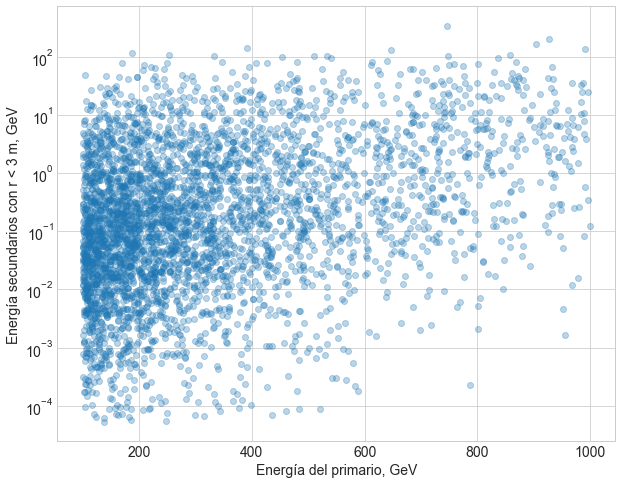

In [83]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], Es3[1:10001], 'o', alpha=0.3)
pyplot.yscale('log')

plt.xlabel("Energía del primario, GeV")
plt.ylabel("Energía secundarios con r < 3 m, GeV")

In [84]:
Es_e = [i for i in Es3 if i > 10]
len(Es_e)

323

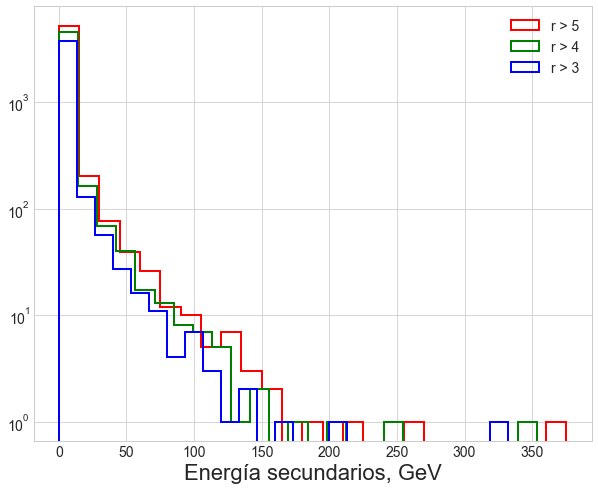

In [85]:
plt.figure(figsize=(10, 8))
plt.hist(Es5_, bins=25, histtype='step', color="r", linewidth=2, fill=False, label="r > 5");
plt.hist(Es4_, bins=25, histtype='step', color="g", linewidth=2, fill=False, label="r > 4");
plt.hist(Es3_, bins=25, histtype='step', color="b", linewidth=2, fill=False, label="r > 3");

pyplot.yscale('log')
plt.xlabel("Energía secundarios, GeV", fontsize=22)
plt.legend()
plt.show()